In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

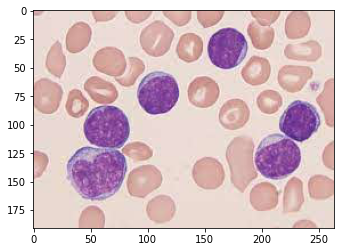

In [59]:
cvimg = cv2.imread('dataset/train/img-1.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

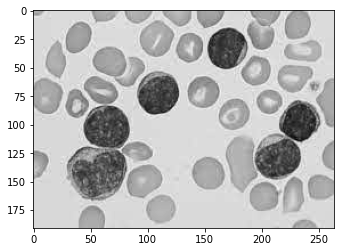

In [60]:
gsimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gsimg, 'gray')

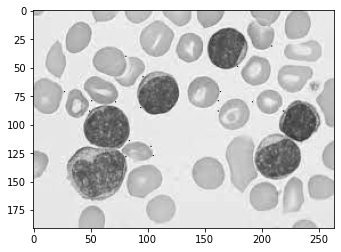

In [61]:
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')
    return img_gray
scgsimg = my_rgb2gray(rgbimg)
plt.imshow(scgsimg, 'gray')

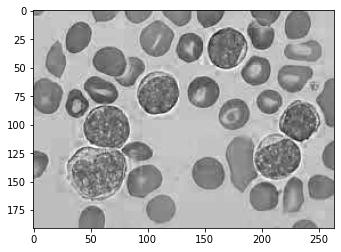

In [62]:
blueimg = cvimg[:,:,0].astype('float64')
blueimg *= (255.0/blueimg.max())
blueimg = blueimg.astype('uint8')
plt.imshow(blueimg, 'gray')

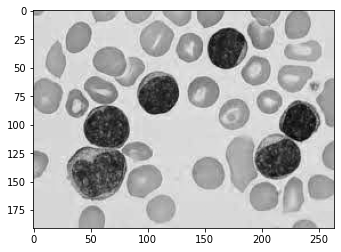

In [63]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

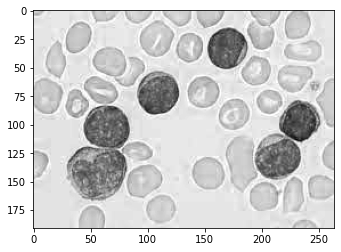

In [64]:
redimg = cvimg[:,:,2].astype('float64')
redimg *= (255.0/redimg.max())
redimg = redimg.astype('uint8')
plt.imshow(redimg, 'gray')

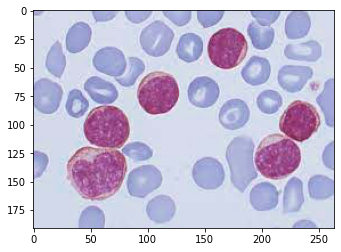

In [65]:
plt.imshow(cvimg)

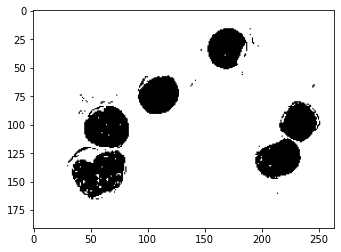

In [66]:
_, bingreenimg = cv2.threshold(greenimg, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bingreenimg, 'gray')

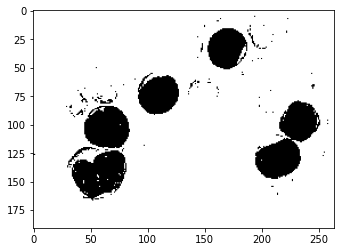

In [67]:
adabingreenimg = cv2.adaptiveThreshold(greenimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 64)
plt.imshow(adabingreenimg, 'gray')

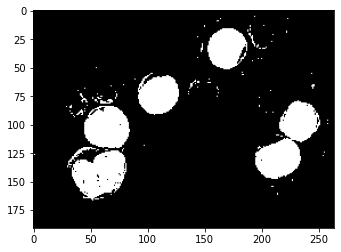

In [68]:
invadabingreenimg = 255-adabingreenimg
plt.imshow(invadabingreenimg, 'gray')

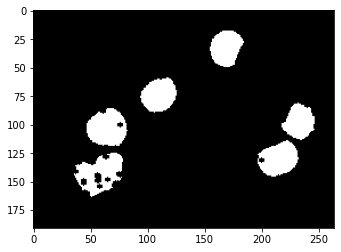

In [69]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erodedinvadabingreenimg = cv2.erode(invadabingreenimg, kernel, iterations=1)
plt.imshow(erodedinvadabingreenimg, 'gray')

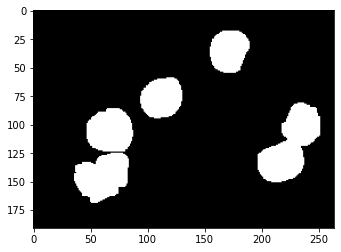

In [70]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilatederodedinvadabingreenimg = cv2.dilate(erodedinvadabingreenimg, kernel, iterations=5)
plt.imshow(dilatederodedinvadabingreenimg, 'gray')

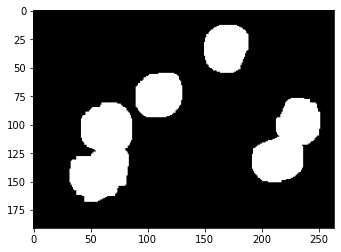

In [71]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(invadabingreenimg,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, 'gray')

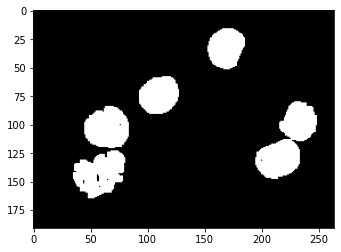

In [72]:
plt.imshow(opening, 'gray')

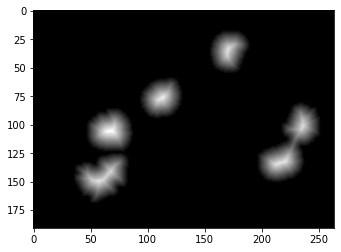

In [73]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(dilatederodedinvadabingreenimg,cv2.DIST_L2,5)
plt.imshow(dist_transform, 'gray')

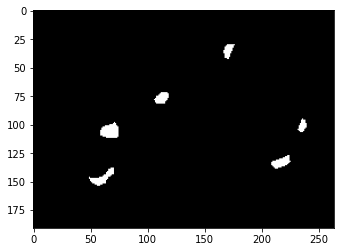

In [74]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, 'gray')

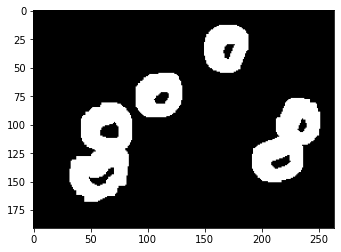

In [75]:
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, 'gray')

In [76]:
img, contours, hierarchy = cv2.findContours(dilatederodedinvadabingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

5


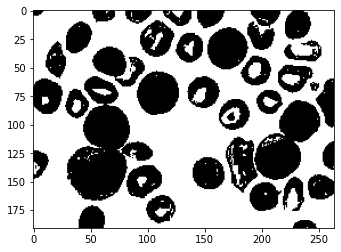

In [77]:
_, bingsimg = cv2.threshold(gsimg, 192, 255, cv2.THRESH_BINARY)
plt.imshow(bingsimg, 'gray')

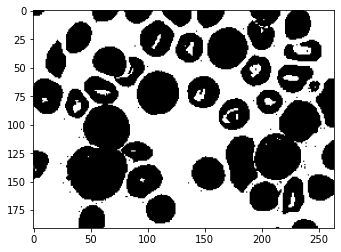

In [78]:
adabingsimg = cv2.adaptiveThreshold(gsimg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 535, 0)
plt.imshow(adabingsimg, 'gray')

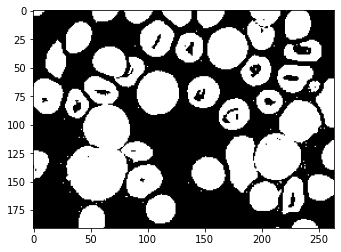

In [79]:
invadabingsimg = 255 - adabingsimg
plt.imshow(invadabingsimg, 'gray')

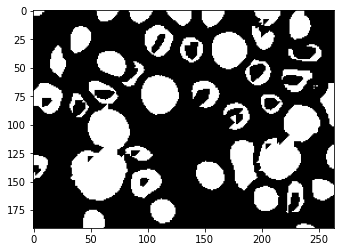

In [80]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
erodedinvadabingsimg = cv2.erode(invadabingsimg, kernel, iterations=4)
plt.imshow(erodedinvadabingsimg, 'gray')

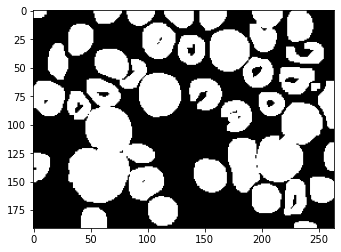

In [56]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilatederodedinvadabingsimg = cv2.dilate(erodedinvadabingsimg, kernel, iterations=4)
plt.imshow(dilatederodedinvadabingsimg, 'gray')

In [57]:
img, contours, hierarchy = cv2.findContours(dilatederodedinvadabingsimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

61


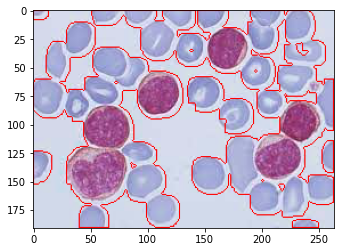

In [26]:
img = cvimg.copy()
cv2.drawContours(img, contours, -1, (255, 0, 0), 1,)
plt.imshow(img)

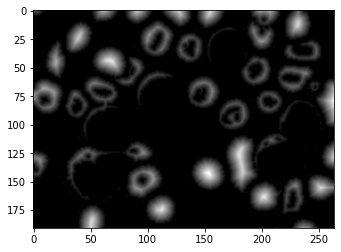

In [83]:
# Finding sure foreground area
unknown = cv2.subtract(invadabingsimg,dilatederodedinvadabingreenimg)
dist_transform = cv2.distanceTransform(unknown,cv2.DIST_L2,5)
plt.imshow(dist_transform, 'gray')

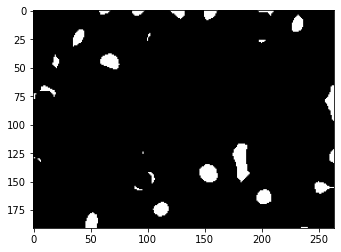

In [86]:
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg, 'gray')